In [64]:
import pandas as pd
import numpy as np
import datetime
import holidays
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

In [65]:
df = pd.read_csv("data/bikes.csv", index_col=0)

<p> Eliminamos la columna index al tratarse de un índice </p>

In [66]:
df.drop(['instant'], axis= 1, inplace= True)

<p> Cambiamos la columna dteday a datetime </p>

In [67]:
df["dteday"] = pd.to_datetime(df["dteday"], format='%d-%m-%Y')

In [68]:
df.head(15)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2018-01-02,spring,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,2018-01-03,spring,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,2018-01-04,spring,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,2018-01-05,spring,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600
5,2018-01-06,spring,0,1,0,4,1,1,8.38,11.66,51.83,6.00,88,1518,1606
6,2018-01-07,spring,0,1,0,5,1,2,8.06,10.44,49.87,11.30,148,1362,1510
7,2018-01-08,spring,0,1,0,6,0,2,6.76,8.11,53.58,17.88,68,891,959
8,2018-01-09,spring,0,1,0,0,0,1,5.67,5.81,43.42,24.25,54,768,822
9,2018-01-10,spring,0,1,0,1,1,1,6.18,7.54,48.29,14.96,41,1280,1321


Recategorizamos la columna "yr"

In [69]:
df['yr'] = df['dteday'].apply(lambda x: x.year)

Recategorizamos la columna "mnth"

In [70]:
df['mnth'] = df['dteday'].apply(lambda x: x.strftime("%b"))

In [71]:
meses = {
    "Jan": "ene",
    "Feb": "feb",
    "Mar": "mar",
    "Apr": "abr",
    "May": "may",
    "Jun": "jun",
    "Jul": "jul",
    "Aug": "ago",
    "Sep": "sep",
    "Oct": "oct",
    "Nov": "nov",
    "Dec": "dic"
}

df['mnth'] = df['mnth'].replace(meses)

Recategorizamos la columna "weekday"

In [72]:
df['weekday'] = df['dteday'].apply(lambda x: x.strftime("%a"))

In [73]:
dias_semana = {
    "Mon": "lun",
    "Tue": "mar",
    "Wed": "mie",
    "Thu": "jue",
    "Fri": "vie",
    "Sat": "sab",
    "Sun": "dom"
}

df['weekday'] = df['weekday'].replace(dias_semana)

Recategorizamos la columna "season"

In [74]:
def estacion(fecha):
    
    #Establecemos los periodos de cada estación:
    primavera_inicio = pd.Timestamp(fecha.year, 3, 20)
    primavera_fin = pd.Timestamp(fecha.year, 6, 20)
    verano_inicio = pd.Timestamp(fecha.year, 6, 21)
    verano_fin = pd.Timestamp(fecha.year, 9, 22)
    otono_inicio = pd.Timestamp(fecha.year, 9, 23)
    otono_fin = pd.Timestamp(fecha.year, 12, 20)
    
    #hacemos la conversión de fecha a estación
    if primavera_inicio <= fecha <= primavera_fin:
        return "primavera"
    elif verano_inicio <= fecha <= verano_fin:
        return "verano"
    elif otono_inicio <= fecha <= otono_fin:
        return "otoño"
    else:
        return "invierno"

# Hacemos el apply:
df["season"] = df["dteday"].apply(estacion)

Recategorizamos "holiday"

In [75]:
lista_festivos = []

fiestas_dc=holidays.US(subdiv='DC', years=[2018, 2019])

for fecha, name in sorted(fiestas_dc.items()):
    lista_festivos.append(str(fecha))


def holidays(fecha):
    
    if str(fecha).split(" ")[0] in lista_festivos:
        return "festivo"
    
    else:
        return "no festivo"

In [76]:
df["holiday"] = df["dteday"].apply(holidays)

In [77]:
df.groupby("yr")["holiday"].value_counts()

yr    holiday   
2018  no festivo    353
      festivo        12
2019  no festivo    354
      festivo        11
Name: count, dtype: int64

Recategorizamos "workingday"

In [78]:
def dias_laborables(row):
    if row["holiday"] == "festivo" or row["weekday"] in ["sab", "dom"]:
        return "no laborable"
    else:
        return "laborable"

In [79]:
df["workingday"] = df.apply(dias_laborables, axis=1)

Regaregorizamos "weathersit"

In [80]:
mapeo_weather = {
    1: 'buen tiempo',
    2: 'nublado',
    3: 'ligeramente mal tiempo',
    4: 'mal tiempo'
}
df['weathersit'] = df['weathersit'].replace(mapeo_weather)

Cambiamos el nombre a las columnas:

In [81]:
# Cambio nombre columnas
df.rename(columns = {"dteday": "fecha","season": "estacion", "yr": "año", "mnth": "mes", "holiday": "festivo", "weekday": "dia","workingday": "laborable","weathersit": "meteo",
                     "temp": "temperatura","atemp": "sensacion_termica","hum": "humedad","windspeed": "velo_viento","casual": "usu_casuales", "registered": "usu_registrados", 
                     "cnt": "total_alquiler"}, inplace = True)

In [82]:
df.sample(10)

,fecha,estacion,año,mes,festivo,dia,laborable,meteo,temperatura,sensacion_termica,humedad,velo_viento,usu_casuales,usu_registrados,total_alquiler
376,2019-01-12,invierno,2019,ene,no festivo,sab,no laborable,nublado,15.68,19.10,80.29,12.12,269,3828,4097
277,2018-10-05,otoño,2018,oct,no festivo,vie,laborable,buen tiempo,22.07,26.36,64.79,11.88,559,4267,4826
565,2019-07-20,verano,2019,jul,no festivo,sab,no laborable,nublado,27.30,30.65,84.42,14.00,747,5123,5870
250,2018-09-08,verano,2018,sep,no festivo,sab,no laborable,ligeramente mal tiempo,25.99,27.77,93.96,12.91,153,1689,1842
264,2018-09-22,verano,2018,sep,no festivo,sab,no laborable,nublado,25.76,27.75,90.21,8.58,555,4240,4795
31,2018-02-01,invierno,2018,feb,no festivo,jue,laborable,nublado,7.88,11.73,82.96,3.57,47,1313,1360
582,2019-08-06,verano,2019,ago,no festivo,mar,laborable,nublado,30.85,35.51,65.42,8.67,1233,5780,7013
185,2018-07-05,verano,2018,jul,no festivo,jue,laborable,buen tiempo,30.61,34.82,59.04,8.46,1031,3634,4665
224,2018-08-13,verano,2018,ago,no festivo,lun,laborable,nublado,28.12,32.29,72.96,14.17,1504,2646,4150
672,2019-11-04,otoño,2019,nov,no festivo,lun,laborable,buen tiempo,13.36,16.48,53.29,12.00,1201,3906,5107


Cambiamos el tipo de "año":

In [83]:
df["año"] = pd.Categorical(df["año"])

In [84]:
df.dtypes

fecha                datetime64[ns]
estacion                     object
año                        category
mes                          object
festivo                      object
dia                          object
laborable                    object
meteo                        object
temperatura                 float64
sensacion_termica           float64
humedad                     float64
velo_viento                 float64
usu_casuales                  int64
usu_registrados               int64
total_alquiler                int64
dtype: object

Vamos a comprobar outliers:

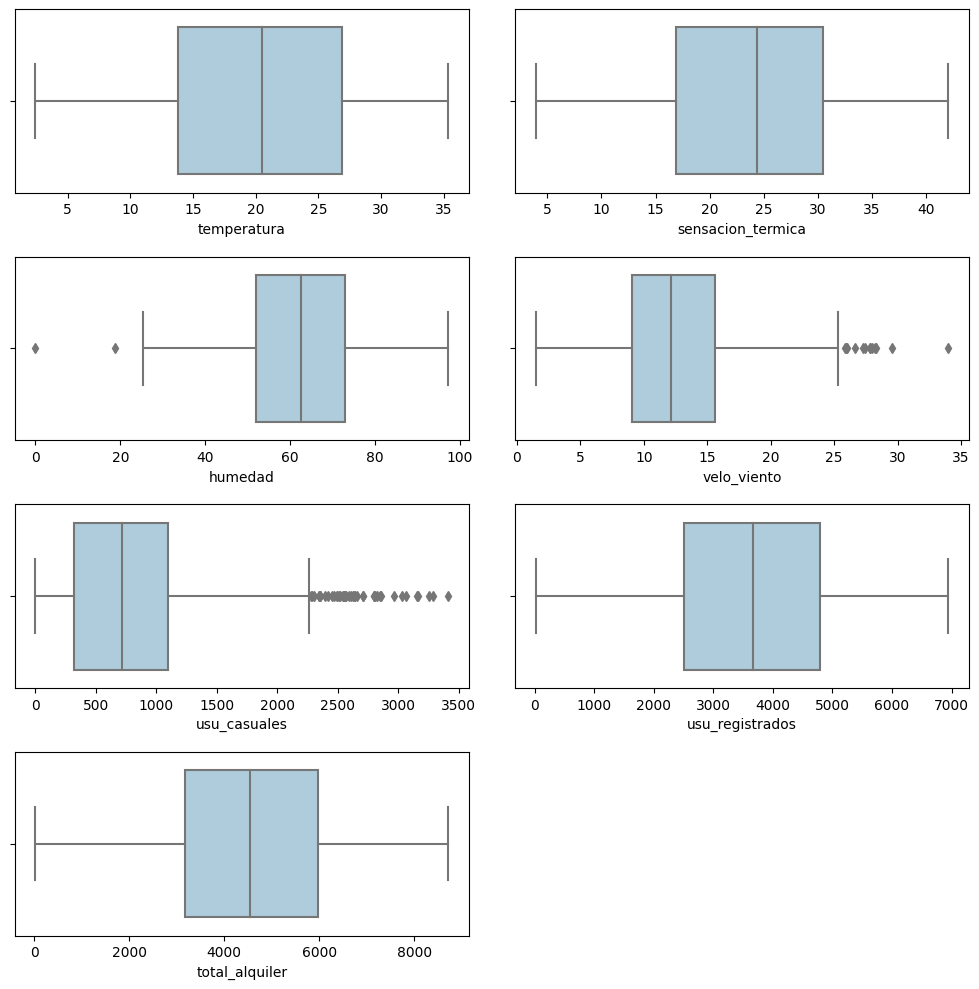

In [85]:
numericas = df.select_dtypes(include=np.number)

fig, axes = plt.subplots(4, 2, figsize=(10,10))
axes = axes.flat
for indice, columna in enumerate(numericas.columns):
    sns.boxplot(x = numericas[columna], data = df, ax = axes[indice], palette = "Paired");
plt.tight_layout()
fig.delaxes(axes[-1])
plt.show()

A la vista de los outliers, mantendríamos todos (por ser valores que parecen reales), salvo en el caso de "humedad" (hemos revisado que estos datos son extremadamente improbables). Vamos a ver quiénes son esos outliers:

In [86]:
df[df["humedad"] < 20]

,fecha,estacion,año,mes,festivo,dia,laborable,meteo,temperatura,sensacion_termica,humedad,velo_viento,usu_casuales,usu_registrados,total_alquiler
49,2018-02-19,invierno,2018,feb,festivo,lun,no laborable,buen tiempo,16.37,19.57,18.79,34.00,532,1103,1635
68,2018-03-10,invierno,2018,mar,no festivo,sab,no laborable,ligeramente mal tiempo,15.95,19.28,0.00,17.55,46,577,623


`CAMBIO DE OUTLIERS`
A la vista de estos valores, hemos decidido reemplazar estos dos outliers por la temperatura mediana dentro de ese mismo mes de ese mismo año y para el mismo tipo de día (los datos de climatología histórica para Washington que hemos encontrado en internet no nos cuadraban con los del dataframe):
- En el caso del 2018-02-19, sacaremos la mediana  de 2018 de días con buen tiempo (hay 19 registros).
- En el caso del 2018-03-10, sacaremos la mediana de marzo de 2018 de días con ligeramente mal tiempo (en este caso, además, la media y la mediana son las mismas).

In [87]:
mediana_humedad = df[(df["año"] == 2018) & (df["meteo"] == "buen tiempo")]["humedad"].median()
df.loc[df["fecha"] == "2018-02-19", "humedad"] = mediana_humedad

In [88]:
df.loc[df["fecha"] == "2018-03-10", "humedad"] = df[(df["año"] == 2018) & (df["meteo"] == "ligeramente mal tiempo")]["humedad"].median()

<p> Guardar los cambios en este archivo al final de la sesión </p>

In [89]:
df.to_pickle("data/bikes_limpieza.pkl")

Vamos a guardar otro dataframe sin tener en cuenta la columna de registrados_totales:

In [90]:
df.drop("total_alquiler", axis= 1, inplace= True)

In [91]:
df.head(2)

,fecha,estacion,año,mes,festivo,dia,laborable,meteo,temperatura,sensacion_termica,humedad,velo_viento,usu_casuales,usu_registrados
0,2018-01-01,invierno,2018,ene,festivo,lun,no laborable,nublado,14.11,18.18,80.58,10.75,331,654
1,2018-01-02,invierno,2018,ene,no festivo,mar,laborable,nublado,14.90,17.69,69.61,16.65,131,670


In [92]:
df.to_pickle("data/bikes_limpieza_sin_totales.pkl")